<a href="https://colab.research.google.com/github/illyesa/Bootcamp_GENAI_Fev2025/blob/main/ExerciceXPW4D3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()

zip_path = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Lister les fichiers dans le répertoire /content/ après décompression
extracted_files = os.listdir('/content/')
print("Fichiers extraits :", extracted_files)

# Vérifiez si le répertoire 'data' existe
if 'data' in extracted_files:
    dataset_dir = '/content/data'
else:
    dataset_dir = '/content/'

print("Contenu du répertoire dataset :", os.listdir(dataset_dir))

Saving Flower Classification.zip to Flower Classification (1).zip
Fichiers extraits : ['.config', 'Data', 'Flower Classification.zip', 'Flower Classification (1).zip', 'sample_data']
Contenu du répertoire dataset : ['.config', 'Data', 'Flower Classification.zip', 'Flower Classification (1).zip', 'sample_data']


In [4]:
import os

data_dir = '/content/Data'
print("Contenu du répertoire Data :", os.listdir(data_dir))

if 'train' in os.listdir(data_dir) and 'val' in os.listdir(data_dir):
    dataset_dir = data_dir
    print("Le répertoire Data contient les sous-répertoires train et val.")
else:
    print("Le répertoire Data ne contient pas les sous-répertoires attendus.")


Contenu du répertoire Data : ['train', 'val']
Le répertoire Data contient les sous-répertoires train et val.


Found 13642 files belonging to 14 classes.
Found 98 files belonging to 14 classes.
Nombre d'images par classe:
astilbe: 726
bellflower: 872
black_eyed_susan: 986
calendula: 1011
california_poppy: 1021
carnation: 924
common_daisy: 978
coreopsis: 1035
dandelion: 1038
iris: 1041
rose: 986
sunflower: 1013
tulip: 1034
water_lily: 977


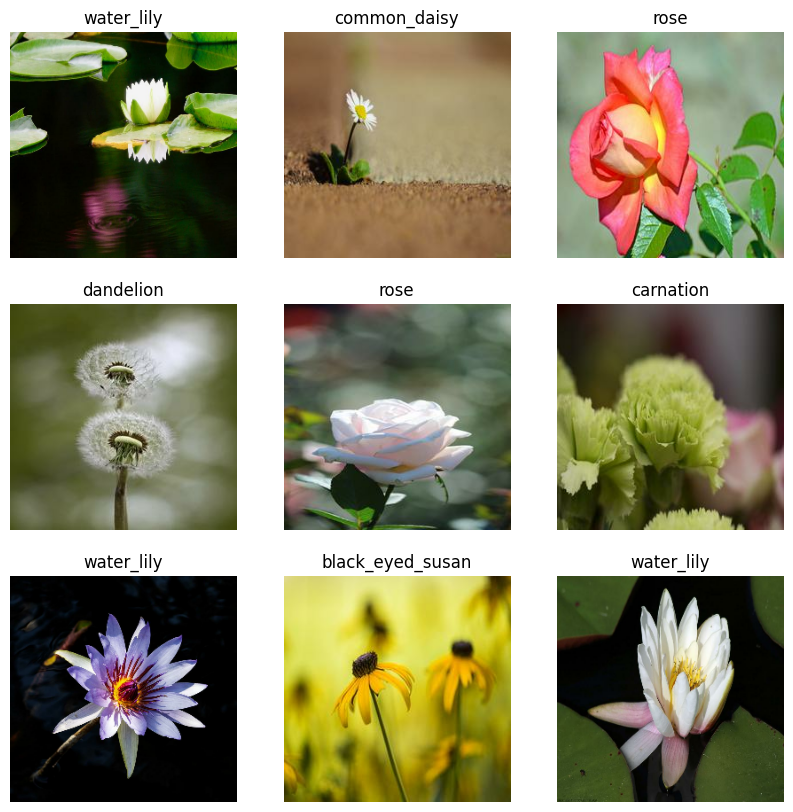

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

train_dir = '/content/Data/train'
val_dir = '/content/Data/val'

batch_size = 32
img_height = 256
img_width = 256

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_dataset.class_names

print("Nombre d'images par classe:")
for class_name in class_names:
    count = len([image for image, label in train_dataset.unbatch() if class_names[label.numpy()] == class_name])
    print(f"{class_name}: {count}")

def visualize_images(dataset, class_names):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

visualize_images(train_dataset, class_names)


In [6]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/5
427/427 ━━━━━━━━━━━━━━━━━━━━ 38s 67ms/step - accuracy: 0.3319 - loss: 1.9909 - val_accuracy: 0.4898 - val_loss: 1.3165 - learning_rate: 0.0010
Epoch 2/5
427/427 ━━━━━━━━━━━━━━━━━━━━ 29s 55ms/step - accuracy: 0.5989 - loss: 1.1533 - val_accuracy: 0.6224 - val_loss: 1.1583 - learning_rate: 0.0010
Epoch 3/5
427/427 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.7559 - loss: 0.7177 - val_accuracy: 0.6429 - val_loss: 1.0836 - learning_rate: 0.0010
Epoch 4/5
427/427 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.8718 - loss: 0.3855 - val_accuracy: 0.6122 - val_loss: 1.4632 - learning_rate: 0.0010
Epoch 5/5
427/427 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9324 - loss: 0.2017 - val_accuracy: 0.5918 - val_loss: 1.9310 - learning_rate: 0.0010


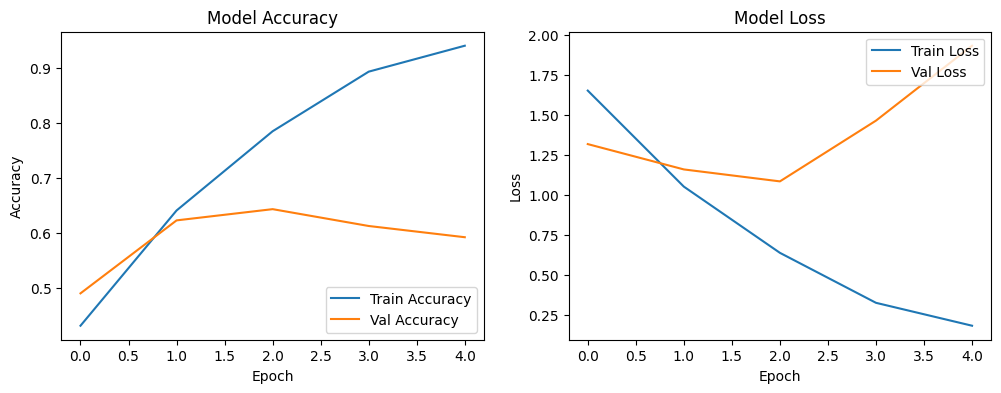

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


In [1]:
import tensorflow as tf

def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    image = tf.image.random_brightness(image, max_delta=0.2)

    crop_size = tf.random.uniform(shape=[], minval=int(0.8 * img_height), maxval=img_height, dtype=tf.int32)
    crop_size = tf.minimum(crop_size, tf.shape(image)[0])  # Assurez-vous que crop_size ne dépasse pas la taille de l'image
    crop_size = tf.minimum(crop_size, tf.shape(image)[1])
    image = tf.image.random_crop(image, [crop_size, crop_size, 3])
    image = tf.image.resize(image, [img_height, img_width])

    return image, label

train_dataset = train_dataset.map(augment)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5,
    callbacks=[early_stopping, reduce_lr]
)


NameError: name 'train_dataset' is not defined

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_dataset = train_dataset.unbatch().batch(batch_size)
train_dataset = train_dataset.map(lambda x, y: (datagen.flow(x, y, batch_size=batch_size)))

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)


TypeError: in user code:

    File "<ipython-input-9-33c8251ce0b2>", line 16, in None  *
        lambda x, y: (datagen.flow(x, y, batch_size=batch_size))
    File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 1103, in flow  **
        return NumpyArrayIterator(
    File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 561, in __init__
        if y is not None and len(x) != len(y):

    TypeError: len is not well defined for a symbolic Tensor (args_0:0). Please call `x.shape` rather than `len(x)` for shape information.


In [ ]:
# Sauvegarder le modèle
model.save('flower_classification_model.h5')
